# Linear Regression

Objective: EDA Real Estate data and prediction using Linear Regression  
Dataset: realestate.csv   
Ref: NA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:,.2f}'.format

data = pd.read_csv('realestate.csv')
print('Dataset size', data.shape)
data.head()

Dataset size (414, 8)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,"2,012.92",32.00,84.88,10,24.98,121.54,37.90
1,2,"2,012.92",19.50,306.59,9,24.98,121.54,42.20
2,3,"2,013.58",13.30,561.98,5,24.99,121.54,47.30
3,4,"2,013.50",13.30,561.98,5,24.99,121.54,54.80
4,5,"2,012.83",5.00,390.57,5,24.98,121.54,43.10


In [2]:
#rename column
data.columns = ['No','TrxDate','HouseAge','MRT_Distance','NoStores','Long','Lat','Price']
data.head()

,No,TrxDate,HouseAge,MRT_Distance,NoStores,Long,Lat,Price
0,1,"2,012.92",32.00,84.88,10,24.98,121.54,37.90
1,2,"2,012.92",19.50,306.59,9,24.98,121.54,42.20
2,3,"2,013.58",13.30,561.98,5,24.99,121.54,47.30
3,4,"2,013.50",13.30,561.98,5,24.99,121.54,54.80
4,5,"2,012.83",5.00,390.57,5,24.98,121.54,43.10


In [3]:
#drop column
data.drop(['No','TrxDate','Long','Lat'],axis=1,inplace=True)
data.head()

,HouseAge,MRT_Distance,NoStores,Price
0,32.00,84.88,10,37.90
1,19.50,306.59,9,42.20
2,13.30,561.98,5,47.30
3,13.30,561.98,5,54.80
4,5.00,390.57,5,43.10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 4 columns):
HouseAge        414 non-null float64
MRT_Distance    414 non-null float64
NoStores        414 non-null int64
Price           414 non-null float64
dtypes: float64(3), int64(1)
memory usage: 13.0 KB


## Correlation

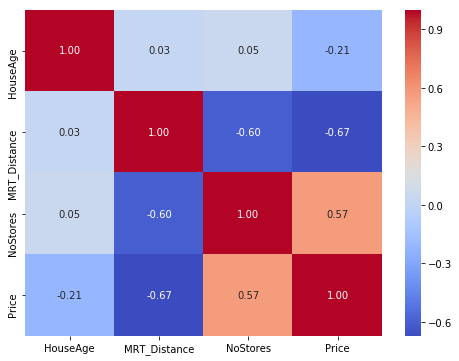

In [5]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(data=data.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [6]:
corr_rank = data.corr()
corr_rank["Price"].sort_values(ascending=False)

Price           1.00
NoStores        0.57
HouseAge       -0.21
MRT_Distance   -0.67
Name: Price, dtype: float64

## Modelling 1: NoStores

In [7]:
#positive correlation
from sklearn import datasets, linear_model

#reshape single column to 1 column array
NoStorex = np.array(data.NoStores).reshape((-1,1))
Pricex = np.array(data.Price).reshape((-1,1))

regr = linear_model.LinearRegression()
regr.fit(NoStorex, Pricex)
print("Coefficients: ", regr.coef_)
print("Intercept   : ", regr.intercept_)

Coefficients:  [[2.63765346]]
Intercept   :  [27.18110478]


In [8]:
#Prediction Method using Formula
noofstore_new = 9
pred = (noofstore_new * regr.coef_) + regr.intercept_
pred

array([[50.91998595]])

In [9]:
#Prediction Method using predict
regr.predict([[noofstore_new]])

array([[50.91998595]])

## Modelling 2: MRT Distance

In [10]:
mrtdis = np.array(data.MRT_Distance).reshape((-1,1))

regr = linear_model.LinearRegression()
regr.fit(mrtdis, Pricex)
print("Coefficients: ", regr.coef_)
print("Intercept   : ", regr.intercept_)

Coefficients:  [[-0.00726205]]
Intercept   :  [45.85142706]


In [11]:
mrtdis_new = 306
pred = (mrtdis_new * regr.coef_) + regr.intercept_
pred

array([[43.62923926]])

In [12]:
regr.predict([[mrtdis_new]])

array([[43.62923926]])